# Importation des données

In [3]:
#Importation des bibliothèques et du CSV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

df_original = pd.read_csv('spam.csv', encoding="ISO-8859-1")
df_original.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Nettoyage des données

In [4]:
# Retrait des colonnes inutiles
df = df_original[['v1', 'v2']].copy()
df.rename(columns={"v1": "label", "v2": "content"}, inplace = True)

print("Nombre de SMS avec doublons:", df.label.value_counts().sum(),'\n',  round(df.label.value_counts(normalize = True), 3))

#Retrait des lignes identiques
df.drop_duplicates(inplace = True)

print("\n Nombre de SMS sans doublons:", df.label.value_counts().sum(),'\n',  round(df.label.value_counts(normalize = True), 3))

#Le Ratio ham/spam est donc conservé à 0.8% près après retrait des 403 doublons.

df.to_csv('spam_clean.csv',index = False)
#export du dataframe nettoyé dans le dossier de travail sous le nom de 'spam_clean.csv'

Nombre de SMS avec doublons: 5572 
 ham     0.866
spam    0.134
Name: label, dtype: float64

 Nombre de SMS sans doublons: 5169 
 ham     0.874
spam    0.126
Name: label, dtype: float64


# Identification des Features

In [6]:
import re
df = pd.read_csv('spam_clean.csv')

In [7]:
#Ajout d'une feature "length" contenant le nombre de caractère compris dans le SMS
df['length'] = df['content'].apply(len)
df.head()

,label,content,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
#Ajout d'une feature "num_tel" contenant le nombre de numéros de téléphone dans le message
num_tel = []

for k in df.index:
    num_tel.append(len(re.findall("\D\d\d\d\d",df['content'][k])))

#print(pd.Series(num_tel).value_counts())
df['num_tel'] = pd.Series(num_tel)
df.head()

,label,content,length,num_tel
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [9]:
#Ajout d'une feature "livre" attestant de la présence du symbole £ dans le message
livre = []

for k in df.index:
    livre.append(len(re.findall("£|$",df['content'][k])))

#pd.Series(livre).value_counts()

#df['£/$'] = pd.Series(livre)
#df

In [10]:
#Ajout d'une feature "ratio_upper_case" contenant la proportion de majuscules dans le message
ratio = []

for k in df.index:
    char = len(re.findall("[a-zA-Z]",df['content'][k]))
    upper = len(re.findall("[A-Z]",df['content'][k]))
    if char != 0: ratio.append(round((upper/char), 4))
    else: ratio.append(0)

print(pd.Series(ratio).value_counts().sum())
df['ratio_UC'] = pd.Series(ratio)
df.head()

5169


,label,content,length,num_tel,ratio_UC
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0.0361
1,ham,Ok lar... Joking wif u oni...,29,0,0.1111
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031
3,ham,U dun say so early hor... U c already then say...,49,0,0.0606
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426


In [11]:
#Ajout d'une feature "URL" contenant le nombre d'URL dans le message
URL = []

for k in df.index:
        URL.append(len(re.findall(r"\.co", df['content'][k], re.IGNORECASE)))

#pd.Series(URL).value_counts()

df['URL'] = pd.Series(URL)
df.head()

,label,content,length,num_tel,ratio_UC,URL
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0.0361,0
1,ham,Ok lar... Joking wif u oni...,29,0,0.1111,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031,0
3,ham,U dun say so early hor... U c already then say...,49,0,0.0606,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426,0


In [12]:
#Ajout de features justifiant la présence de certains mots connotés SPAM 
free = []
call = []
txt = []
text = []
claim = []
mobile = []
stop = []
reply = []


for k in df.index:
    free.append((len(re.findall(r"FREE",df['content'][k], re.IGNORECASE))))
    call.append((len(re.findall(r"CALL",df['content'][k], re.IGNORECASE))))
    txt.append((len(re.findall(r"TXT",df['content'][k], re.IGNORECASE))))
    text.append((len(re.findall(r"TEXT",df['content'][k], re.IGNORECASE))))
    claim.append((len(re.findall(r"CLAIM",df['content'][k], re.IGNORECASE))))
    mobile.append((len(re.findall(r"MOBILE",df['content'][k], re.IGNORECASE))))
    stop.append((len(re.findall(r"STOP",df['content'][k], re.IGNORECASE))))
    reply.append((len(re.findall(r"REPLY",df['content'][k], re.IGNORECASE))))


#print(pd.Series(free).value_counts())

df['free'] = pd.Series(free)
df['call'] = pd.Series(call)
df['txt'] = pd.Series(txt)
df['text'] = pd.Series(text)
df['claim'] = pd.Series(claim)
df['mobile'] = pd.Series(mobile)
df['stop'] = pd.Series(stop)
df['reply'] = pd.Series(reply)

df.head()

,label,content,length,num_tel,ratio_UC,URL,free,call,txt,text,claim,mobile,stop,reply
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0.0361,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,29,0,0.1111,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031,0,1,0,1,1,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,49,0,0.0606,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426,0,0,0,0,0,0,0,0,0


In [13]:
cm = df.corr(method = 'pearson')
cm

,length,num_tel,ratio_UC,URL,free,call,txt,text,claim,mobile,stop,reply
length,1.000000,0.328820,0.051468,0.150289,0.196637,0.237576,0.186981,0.138124,0.161874,0.179016,0.155893,0.152261
num_tel,0.328820,1.000000,0.185638,0.163733,0.303868,0.457373,0.364722,0.195576,0.394942,0.298305,0.234097,0.109902
ratio_UC,0.051468,0.185638,1.000000,0.057667,0.081217,0.076017,0.126333,0.033807,0.053222,0.069996,0.043946,0.050070
URL,0.150289,0.163733,0.057667,1.000000,0.139305,0.010813,0.204612,0.165287,0.023624,0.068922,0.163714,0.056043
free,0.196637,0.303868,0.081217,0.139305,1.000000,0.202601,0.268582,0.246980,0.057716,0.365272,0.179814,0.225315
call,0.237576,0.457373,0.076017,0.010813,0.202601,1.000000,0.043502,0.071908,0.239301,0.303081,0.096681,0.074374
txt,0.186981,0.364722,0.126333,0.204612,0.268582,0.043502,1.000000,0.087667,0.061923,0.214134,0.239236,0.067577
text,0.138124,0.195576,0.033807,0.165287,0.246980,0.071908,0.087667,1.000000,0.034963,0.100818,0.191936,0.117203
claim,0.161874,0.394942,0.053222,0.023624,0.057716,0.239301,0.061923,0.034963,1.000000,0.107000,0.115666,0.008833
mobile,0.179016,0.298305,0.069996,0.068922,0.365272,0.303081,0.214134,0.100818,0.107000,1.000000,0.070138,0.087558


<AxesSubplot:>

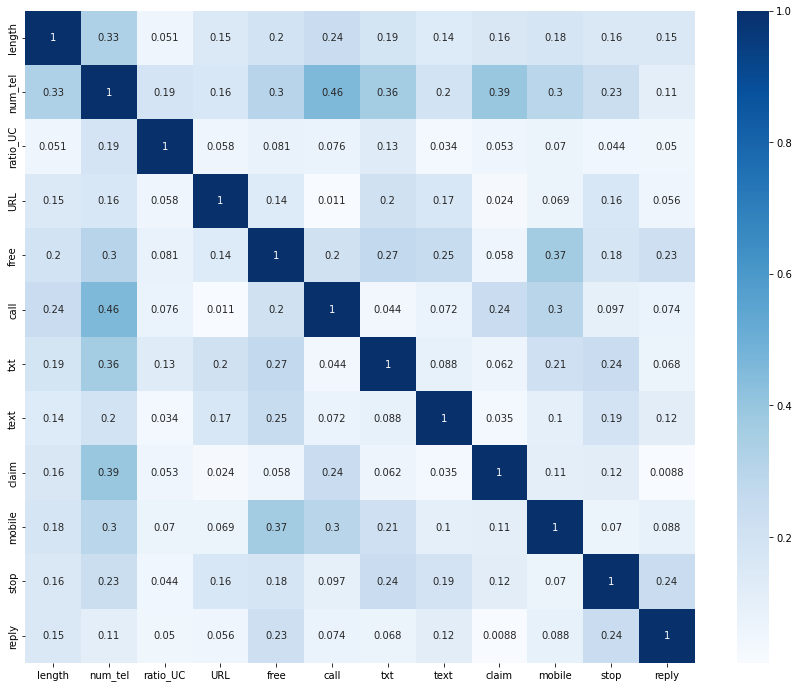

In [14]:
plt.subplots(figsize=(15,12))
sb.heatmap(cm, cmap="Blues", annot=True)

In [181]:
df.to_csv('spam_features.csv',index = False)

# Preprocessing

In [40]:
# data
import pandas as pd

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler


# Pipeline and model
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

df = pd.read_csv('spam_features.csv')

In [41]:
#Target preprocessing
label = LabelEncoder()
y = label.fit_transform(df.label)
print(type(y), y)
# ham : 0, spam : 1

#Features preprocessing
X = df.drop(columns = 'label')
X.head()

<class 'numpy.ndarray'> [0 0 1 ... 0 0 0]


,content,length,num_tel,ratio_UC,URL,free,call,txt,text,claim,mobile,stop,reply
0,"Go until jurong point, crazy.. Available only ...",111,0,0.0361,0,0,0,0,0,0,0,0,0
1,Ok lar... Joking wif u oni...,29,0,0.1111,0,0,0,0,0,0,0,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031,0,1,0,1,1,0,0,0,0
3,U dun say so early hor... U c already then say...,49,0,0.0606,0,0,0,0,0,0,0,0,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426,0,0,0,0,0,0,0,0,0


In [42]:
#Selection des features catégorielles
column_cat = X.select_dtypes(include=['object']).columns.drop(['content'])
print("Features catégorielles :", column_cat)

#Pipeline de preprocessing des features catégorielles
transformer_cat = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')), #Imputation facultative car données complètes
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))])

#Selection des features numériques
column_num = X.select_dtypes(include=['int','float']).columns
print("Features numériques:", column_num)

#Pipeline de preprocessing des features numériques
transformer_num = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='median')), #Imputation facultative car données complètes
    ('scaling', MinMaxScaler())])

#Mises en commun des pipelines précédents 
preprocess = ColumnTransformer(transformers = [
    ('data_num', transformer_num, column_num), 
    ('data_cat', transformer_cat, column_cat)])

set_config(display = 'diagram')
preprocess

Features catégorielles : Index([], dtype='object')
Features numériques: Index(['length', 'num_tel', 'ratio_UC', 'URL', 'free', 'call', 'txt', 'text',
       'claim', 'mobile', 'stop', 'reply'],
      dtype='object')


ColumnTransformer(transformers=[('data_num',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling', MinMaxScaler())]),
                                 Index(['length', 'num_tel', 'ratio_UC', 'URL', 'free', 'call', 'txt', 'text',
       'claim', 'mobile', 'stop', 'reply'],
      dtype='object')),
                                ('data_cat',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index([], dtype='object'))])

In [43]:
#Création des modèles
model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()
model3 = GaussianNB()
model4 = GradientBoostingClassifier()
model5 = SVC()

#Modèle final optimisé par PyCaret
model_final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

pipe_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model_final)])

pipe_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['length', 'num_tel', 'ratio_UC', 'URL', 'free', 'call', 'txt', 'text',
       'claim', 'mobile', 'stop', 'reply'],
      dtype='object')),
                                                 ('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features='log2',
                                        min_impurity_decrease=0.0002,
                                        min_samples_leaf=3, min_samples_split=7,
                                        n_estimators=40, n_jobs=-1,
                                        random_state=0))])

Accuracy Score : 0.98453 
MCC Score: 0.9298


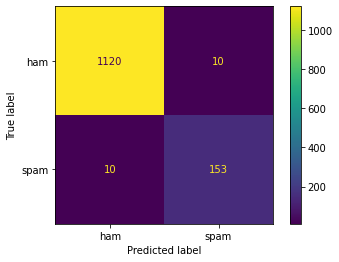

In [44]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, stratify = y)

#Apprentissage
pipe_model.fit(X_train, y_train)

y_pred = pipe_model.predict(X_test)

# Score of models
from sklearn.metrics import accuracy_score, matthews_corrcoef

Acc = accuracy_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)
print("Accuracy Score :", round(Acc, 5), "\nMCC Score:", round(MCC, 5))

#Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

In [46]:
#Extraction des faux postifs et faux négatifs pour analyse
message = X_test.content.tolist() #Récupération de la liste des messages test
faux_positifs = []
faux_négatifs = []
for k in range(len(y_test)):
    if y_test[k] != y_pred[k]:
        if y_test[k] == 0:
            faux_positifs.append(message[k])
        else:
            faux_négatifs.append(message[k])
len(faux_positifs), "Faux Positifs", faux_positifs, len(faux_négatifs),"Faux Négatifs", faux_négatifs

(10,
 'Faux Positifs',
 ['Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!',
  'Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur Soul Ur Guide And U Will Never loose in world....gnun - Sent via WAY2SMS.COM',
  "I'm always on yahoo messenger now. Just send the message to me and i.ll get it you may have to send it in the mobile mode sha but i.ll get it. And will reply.",
  'Yun ah.the ubi one say if Ì_ wan call by tomorrow.call 67441233 look for irene.ere only got bus8,22,65,61,66,382. Ubi cres,ubi tech park.6ph for 1st 5wkg days.Ì¬n',
  'You have registered Sinco as Payee. Log in at icicibank.com and enter URN  &lt;#&gt;  to confirm. Beware of frauds. Do NOT share or disclose URN to anyone.',
  'My mobile number.pls sms ur mail id.convey regards to achan,amma.Rakhesh.Qatar',
  'My tuition is at 330. Hm we go for the 1120 to 1205 one? Do you mind?',
  'GOD ASKED, \\What is forgiveness?\\" A little ch

# PyCaret

In [111]:
# check version
from pycaret.utils import version
version()

'2.3.6'

In [112]:
import pandas as pd
df = pd.read_csv("spam_features.csv")
df.drop(['content'], axis = 1, inplace = True)
print(df.dtypes)

label        object
length        int64
num_tel       int64
ratio_UC    float64
URL           int64
free          int64
call          int64
txt           int64
text          int64
claim         int64
mobile        int64
stop          int64
reply         int64
dtype: object


In [113]:
from pycaret.classification import *
clf1 = setup(data = df, target = "label",
             session_id = 0,
             numeric_features = ['length', 'num_tel',  'ratio_UC',
                                 'URL', 'free', 'txt', 'text', 'call',
                                'claim', 'mobile', 'stop', 'reply'])

,Description,Value
0,session_id,0
1,Target,label
2,Target Type,Binary
3,Label Encoded,"ham: 0, spam: 1"
4,Original Data,"(5169, 13)"
5,Missing Values,0
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [114]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9834,0.9838,0.9075,0.9565,0.9301,0.9207,0.9219,0.4390
rf,Random Forest Classifier,0.9818,0.9791,0.9009,0.9493,0.9229,0.9126,0.9140,0.0610
gbc,Gradient Boosting Classifier,0.9818,0.9842,0.8940,0.9549,0.9222,0.9119,0.9133,0.0290
xgboost,Extreme Gradient Boosting,0.9807,0.9816,0.8918,0.9486,0.9182,0.9073,0.9085,0.1010
lr,Logistic Regression,0.9804,0.9828,0.8782,0.9594,0.9152,0.9042,0.9064,0.5790
lightgbm,Light Gradient Boosting Machine,0.9804,0.9761,0.8872,0.9506,0.9160,0.9050,0.9067,0.0550
ada,Ada Boost Classifier,0.9801,0.9782,0.8850,0.9506,0.9149,0.9037,0.9055,0.0210
et,Extra Trees Classifier,0.9795,0.9740,0.8963,0.9354,0.9138,0.9022,0.9035,0.0560
dt,Decision Tree Classifier,0.9740,0.9368,0.8827,0.9071,0.8921,0.8774,0.8792,0.0040
lda,Linear Discriminant Analysis,0.9696,0.9819,0.7703,0.9786,0.8597,0.8430,0.8520,0.0040


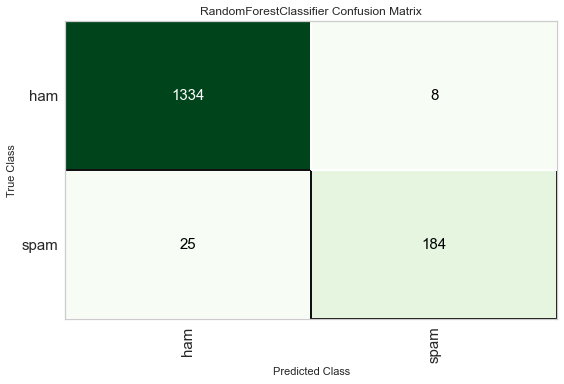

In [161]:
model_rf = create_model('rf')
plot_model(model_rf, plot = 'confusion_matrix')

In [163]:
tuned_rf = tune_model(model_rf, n_iter = 500, optimize = 'MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9807,0.9746,0.9545,0.8936,0.9231,0.9120,0.9127
1,0.9751,0.9531,0.8636,0.9268,0.8941,0.8801,0.8808
2,0.9834,0.9949,0.9318,0.9318,0.9318,0.9224,0.9224
3,0.9834,0.9843,0.9545,0.9130,0.9333,0.9239,0.9242
4,0.9890,0.9982,0.9778,0.9362,0.9565,0.9502,0.9505
5,0.9945,0.9992,0.9778,0.9778,0.9778,0.9746,0.9746
6,0.9807,0.9826,0.9111,0.9318,0.9213,0.9103,0.9104
7,0.9862,0.9906,0.9333,0.9545,0.9438,0.9359,0.9360
8,0.9834,0.9830,0.8636,1.0000,0.9268,0.9175,0.9206
9,0.9861,0.9951,0.9318,0.9535,0.9425,0.9347,0.9347


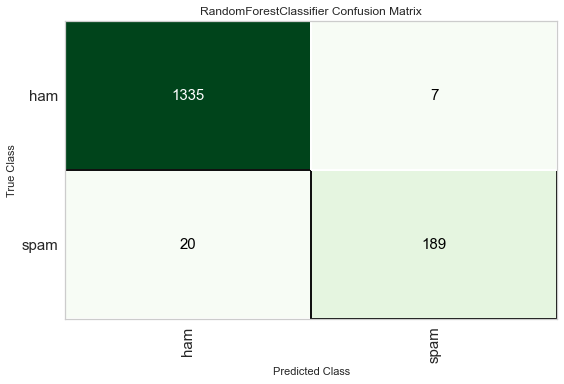

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [200]:
plot_model(tuned_rf, plot = 'confusion_matrix')
print(tuned_rf)